In [2]:
import numpy as np
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/p-asalisbury/Desktop/ProjetVoila/2019.csv', sep = ",")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
# Axe d'analyse : on cherche à évaluer quelles variables impactent le bonheur des habitants en fonction des pays

In [4]:
# Preprocessing 
# On comptabilise les données manquantes et on retire les lignes si besoin
# Par chance il n'y a aucune donnée manuante !

df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
# On remarque qu'il y a bien 156 pays pour toutes les colonnes
# Les moyennes et le valeurs max sont cohérentes 
# Il y a juste des 0 en valeurs minimum donc on va les quantifier, si il y a moins de 10% ça ne va pas nous géner. 

In [6]:
df.isin([0]).sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

<AxesSubplot:>

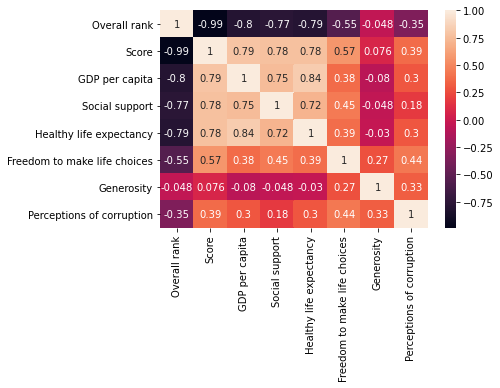

In [7]:
# On fait un modèle de corrélation 

df = pd.DataFrame(df)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

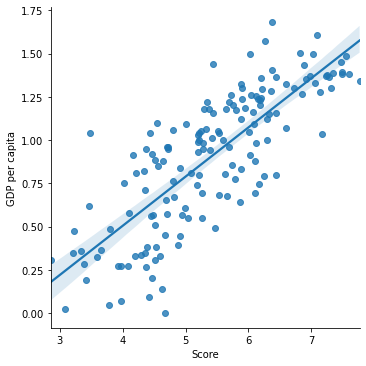

In [8]:
# Grace au modèle de correlation on remarque que le score - somme des variables pour mesurer le bonheur - 
# est fortement corrélé avec le GPD per capita et pas corrélé avec la generosity !
# Voici deux regression linéaire simples qui illustrent notre propos :

sns.lmplot(x="Score", y="GDP per capita", data=df);

# Notons que Y est une variable continue donc quantitative d'où la possibilité de faire un modèle de régrssion 

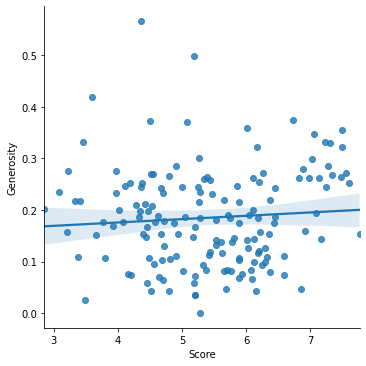

In [9]:
sns.lmplot(x="Score", y="Generosity", data=df);

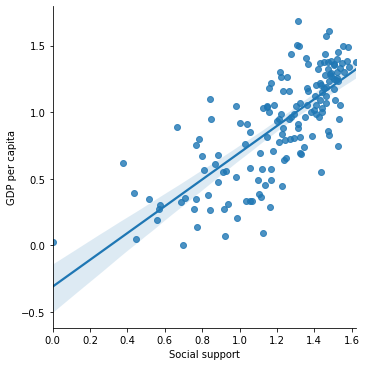

In [10]:
# Les deux graphiques de Hanene : 
#1
sns.lmplot(x="Social support", y="GDP per capita", data=df);


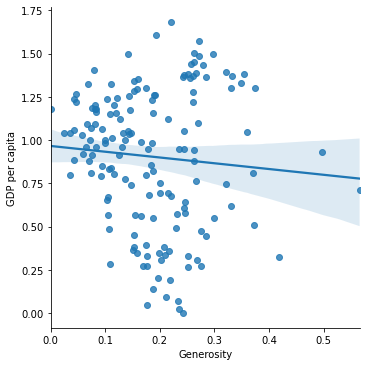

In [11]:
#2
sns.lmplot(x="Generosity", y="GDP per capita", data=df);

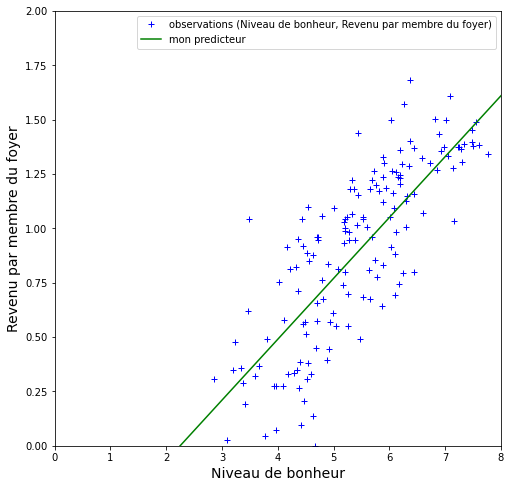

In [12]:
import matplotlib.pyplot as plt

def pred_a(x):
    a=0.28
    b=-0.63
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

xl=[0,10]

fig = plt.figure(figsize=(8,8))
plt.plot(df['Score'],df['GDP per capita'],'+',c='blue',label='observations (Niveau de bonheur, Revenu par membre du foyer)')
plt.plot(xl,pred_a(xl),c='green',label='mon predicteur')
plt.xlabel('Niveau de bonheur', fontsize=14)
plt.ylabel('Revenu par membre du foyer', fontsize=14)
plt.xlim([0,8])
plt.ylim([0,2])
#plt.xlim([2.5,8])
#plt.ylim([0,2])
plt.legend()
plt.show()

In [126]:
x=df['Score']
y=df['GDP per capita']

In [127]:
# Exemple calcul d'une fonction implementation d'une fonction somme et equivalence pandas
tmp=0
for i in range(len(x)):
    tmp=tmp+x[i]*y[i]
print(tmp,(df['Score']*df['GDP per capita']).sum())

818.066182 818.066182


In [128]:
# Calcul des membres principaux de la solution a et b
# Puis calcul du a


un=len(x)*(df['Score']*df['GDP per capita']).sum()

sumx=df['Score'].sum()
sumy=df['GDP per capita'].sum()

deux=len(df['Score'])*((df['Score']*df['Score']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.284133433668038

In [129]:
# Puis calcul du b
quatre=sumy*((df['Score']*df['Score']).sum())
cinq=sumx*(df['Score']*df['GDP per capita']).sum()
six=len(df['Score'])*((df['Score']*df['Score']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

-0.6311893604681114

In [130]:
a=0.284133433668038
b=-0.6311893604681114

def pred(x,a,b):
    return a*x+b

pred(2,a,b)

-0.06292249313203535

In [131]:
import math

est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 

print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df['GDP per capita'])**2).sum()/len(df)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df['GDP per capita'])**2).sum()/len(df)))

RMSE du meilleur predicteur selon moindre carré 0.24147127831033316
RMSE du predicteur identifié analytiquement 0.268892085755701


In [132]:
def rmse(data_x,data_y):
    i = 0
    res = 0
    
    for i in range(len(data_x)):
              
        res += ((nouv_prediction_pere(data_x[i])-data_y[i])**2)/len(data_x)
    
    return math.sqrt(res)


def nouv_prediction_pere(x):
    a = 0.284133433668038
    b = -0.6311893604681114
    return a*x+b


In [133]:
# Nous allons maintenant chercher à évaluer le modèle grace à un indicateur de performance : le RMSE
# C'est la dispersion ou la variabilité de la qualité de la prédiction. Le RMSE peut être relié à la variance du modèle. 
# Souvent, les valeurs de RMSE sont difficiles à interpréter parce que l’on n'est pas en mesure de dire si une valeur de variance est faible ou forte. 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['Score'], est_p))
print(rmse)

4.5714805497369175


In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['GDP per capita'], est_p))
print(rmse)

0.24147127831033316


In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['Generosity'], est_p))
print(rmse)

0.7891123134110191
